In [758]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy.random import seed
import tensorflow

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
import tensorflow as tf
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model # lasso model

# tuning hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint
from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score

# model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
from skll.metrics import kappa
from scipy import stats


from matplotlib import pyplot as plt
from pprint import pprint

In [759]:
# load dataset
DS_ = 8
"csv_files/features_2_training_set_" + str(DS_) + ".csv"

'csv_files/features_2_training_set_8.csv'

# Load data

In [760]:
feature_df = pd.read_csv("csv_files/features_2_training_set_" + str(DS_) + ".csv")
feature_df

,grade,nr_stopwords,avg_sentence_len_words,unique_words,word_count,char_count,avg_word_len,nr_long_words,nr_short_words,most_freq_word_length,...,max_eucl_centroid_distances,max_cos_centroid_similarities,eucl_centroid_min_max,cos_centroid_min_max,standard_distance,eucl_relative_distance,det_eucl_dist_matrix,morans_i,gearys_c,gettis_g
0,34.0,281,15.0,259,679,2741,3.826215,335,344,3,...,1.083884,0.787180,0.579380,0.258798,0.090155,0.083177,-4.476404e-22,-0.000170,0.304821,0.007702
1,46.0,348,12.0,308,785,3180,3.945223,444,341,4,...,1.066734,0.729358,0.647402,0.286441,0.086912,0.081475,1.701262e-24,-0.000132,0.290923,0.006433
2,40.0,381,10.0,323,861,3547,3.979094,447,414,3,...,1.096784,0.702259,0.655923,0.185003,0.085868,0.078291,1.425617e-28,-0.000117,0.307679,0.006090
3,30.0,378,15.0,255,712,2692,3.693820,349,363,2,...,1.122352,0.782002,0.564701,0.177563,0.087804,0.078232,-4.205273e-23,-0.000192,0.325623,0.007084
4,26.0,370,11.0,203,671,2299,3.329359,313,358,4,...,1.170515,0.795780,0.522859,0.115634,0.085726,0.073238,-2.971179e-23,-0.000266,0.389794,0.007050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,32.0,259,9.0,218,556,2269,3.865108,304,252,4,...,1.098227,0.781997,0.576724,0.231126,0.099277,0.090397,-8.136834e-19,-0.000206,0.296006,0.010910
719,40.0,390,9.0,369,835,3780,4.294611,308,527,3,...,1.083885,0.710211,0.655348,0.233441,0.085987,0.079332,-1.450856e-24,-0.000116,0.260629,0.005894
720,40.0,272,7.0,250,576,2492,4.109375,188,388,3,...,1.040934,0.727465,0.662646,0.364033,0.099010,0.095116,-9.458844e-19,-0.000193,0.272364,0.010456
721,40.0,208,8.0,232,475,2059,4.181053,163,312,4,...,1.077300,0.802151,0.565459,0.278010,0.105616,0.098037,-6.220687e-14,-0.000262,0.246744,0.013335


In [761]:
# average number of words per thesis
round(np.mean(feature_df["word_count"]), 2)

614.41

## Prepate train & test data

In [762]:
feature_df.columns

Index(['grade', 'nr_stopwords', 'avg_sentence_len_words', 'unique_words',
       'word_count', 'char_count', 'avg_word_len', 'nr_long_words',
       'nr_short_words', 'most_freq_word_length', 'nr_sentences',
       'nr_long_sentences', 'nr_short_sentences', 'most_freq_sentence_length',
       'dale_chall_readability', 'gunning_fox_index', 'flesh_reading_ease',
       'flesh_kincaid_grade_level', 'automated_readability_index', 'SMOG',
       'LIX', 'OVIX', 'nominal_ratio', 'TTR', 'guirauds_index', 'yules_k',
       'd_estimate', 'hapax_legomena', 'advanced_guiraud', 'nr_unique_pos',
       'avg_tree_height', 'nr_grammar_errors', 'correct_verb_form',
       'comparative_adj', 'superlative_adj', 'modal_aux', 'participle',
       'infinitive_marker', 'verb_baseform', 'verb_past_tense', 'CCONJ',
       'SCONJ', 'NUM', 'DET', 'ADP', 'ADJ', 'ADV', 'PRON', 'PROPN', 'NOUN',
       'nr_spelling_errors', 'nr_capitalization_errors',
       'nr_punctuation_errors', 'grade_as_feature',
       'avg_c

In [763]:
labels = np.array(feature_df['grade'])
pd.Series(labels).value_counts()

40.0    161
36.0     65
30.0     49
35.0     47
34.0     39
37.0     39
32.0     37
31.0     34
33.0     32
45.0     31
42.0     23
41.0     22
38.0     20
43.0     15
44.0     14
46.0     13
50.0     13
28.0     11
39.0      8
29.0      8
47.0      7
27.0      6
25.0      5
26.0      4
20.0      4
24.0      3
48.0      3
49.0      2
55.0      2
21.0      2
60.0      1
15.0      1
22.0      1
10.0      1
dtype: int64

In [764]:
features = np.array(feature_df.drop("grade", axis = 1))
features

array([[ 2.81000000e+02,  1.50000000e+01,  2.59000000e+02, ...,
        -1.69786672e-04,  3.04821270e-01,  7.70229061e-03],
       [ 3.48000000e+02,  1.20000000e+01,  3.08000000e+02, ...,
        -1.32140398e-04,  2.90923389e-01,  6.43299844e-03],
       [ 3.81000000e+02,  1.00000000e+01,  3.23000000e+02, ...,
        -1.16625421e-04,  3.07678529e-01,  6.09037690e-03],
       ...,
       [ 2.72000000e+02,  7.00000000e+00,  2.50000000e+02, ...,
        -1.92928607e-04,  2.72363755e-01,  1.04560580e-02],
       [ 2.08000000e+02,  8.00000000e+00,  2.32000000e+02, ...,
        -2.61773528e-04,  2.46744171e-01,  1.33348264e-02],
       [ 1.00000000e+00,  4.00000000e+00,  5.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [765]:
feature_list = list(feature_df.drop("grade", axis = 1).columns)
feature_list

['nr_stopwords',
 'avg_sentence_len_words',
 'unique_words',
 'word_count',
 'char_count',
 'avg_word_len',
 'nr_long_words',
 'nr_short_words',
 'most_freq_word_length',
 'nr_sentences',
 'nr_long_sentences',
 'nr_short_sentences',
 'most_freq_sentence_length',
 'dale_chall_readability',
 'gunning_fox_index',
 'flesh_reading_ease',
 'flesh_kincaid_grade_level',
 'automated_readability_index',
 'SMOG',
 'LIX',
 'OVIX',
 'nominal_ratio',
 'TTR',
 'guirauds_index',
 'yules_k',
 'd_estimate',
 'hapax_legomena',
 'advanced_guiraud',
 'nr_unique_pos',
 'avg_tree_height',
 'nr_grammar_errors',
 'correct_verb_form',
 'comparative_adj',
 'superlative_adj',
 'modal_aux',
 'participle',
 'infinitive_marker',
 'verb_baseform',
 'verb_past_tense',
 'CCONJ',
 'SCONJ',
 'NUM',
 'DET',
 'ADP',
 'ADJ',
 'ADV',
 'PRON',
 'PROPN',
 'NOUN',
 'nr_spelling_errors',
 'nr_capitalization_errors',
 'nr_punctuation_errors',
 'grade_as_feature',
 'avg_cosine_similariy_high_grade',
 'pattern_cosine',
 'weighted_c

In [766]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state=42)#, stratify=labels)

In [767]:
# https://stackoverflow.com/questions/56894904/how-to-solve-the-error-value-too-large-for-dtypefloat32
# sklearn's RandomForestRegressor silently converts the array to float32 and some values become becomes -inf in float32
# The only way around it is to replace inf values with the maximum of float32

y_train = np.nan_to_num(y_train.astype(np.float32))
X_train =  np.nan_to_num(X_train.astype(np.float32))
y_test = np.nan_to_num(y_test.astype(np.float32))
X_test = np.nan_to_num(X_test.astype(np.float32))
X_test

array([[ 3.7900000e+02,  8.0000000e+00,  2.9100000e+02, ...,
        -1.5821029e-04,  3.2992959e-01,  5.8783172e-03],
       [ 2.8300000e+02,  9.0000000e+00,  2.7700000e+02, ...,
        -1.8857614e-04,  2.7446270e-01,  8.9530721e-03],
       [ 2.2200000e+02,  1.2000000e+01,  2.0700000e+02, ...,
        -3.5613452e-04,  2.8890380e-01,  1.2670983e-02],
       ...,
       [ 2.1700000e+02,  1.0000000e+01,  2.6100000e+02, ...,
        -2.4855987e-04,  2.4068108e-01,  1.1382367e-02],
       [ 3.9300000e+02,  1.0000000e+01,  3.4700000e+02, ...,
        -1.1485583e-04,  2.6962706e-01,  6.0271611e-03],
       [ 2.4300000e+02,  7.0000000e+00,  2.5100000e+02, ...,
        -2.4515684e-04,  2.5723097e-01,  1.1286284e-02]], dtype=float32)

In [768]:
sdtscalar = StandardScaler()
X_train_scaled = sdtscalar.fit_transform(X_train)
X_test_scaled = sdtscalar.fit_transform(X_test)
print("scaled:" + str(np.mean(X_train_scaled)) + " not scaled: " + str(np.mean(X_train)))

scaled:1.2423195e-09 not scaled: 1013.622


# Model fitting

In [769]:
# cross validation settings
cv = RepeatedKFold(n_splits=10, random_state=42, n_repeats=3)

In [770]:
# code from: https://gist.github.com/zhiyzuo/d38159a7c48b575af3e3de7501462e04

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return {"r": r, "p": p, "lo": lo, "hi": hi}

In [771]:
def get_metrics(y_test, pred, model):

    metrics_df = pd.DataFrame({
    "Model": model,
    "QWK": round(kappa(y_test, pred, weights="quadratic"), 5),
    #"Pearson correlation": round(correlation(y_test, pred), 5),
    "PCC": pearsonr_ci(y_test, pred)["r"],
    "PCC CI lo": pearsonr_ci(y_test, pred)["lo"],
    "PCC CI hi": pearsonr_ci(y_test, pred)["hi"],
    "PCC CI p": pearsonr_ci(y_test, pred)["p"],
    "R2": round(r2_score(y_test, pred), 5),
    'RMSE': round(np.sqrt(metrics.mean_squared_error(y_test, pred)), 5), # Root Mean Squared Error
    'MSE': round(metrics.mean_squared_error(y_test, pred), 5), # Mean Squared Error
    'MAE':round(metrics.mean_absolute_error(y_test, pred), 5)}, index=[0]) # Mean Absolute Error

    return metrics_df

# Random Forest Regressor

In [772]:
%timeit
rf =  RandomForestRegressor(random_state = 42, verbose = 1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [773]:
rf_metrics = get_metrics(y_test, rf_pred, "RF Regressor")
rf_metrics

,Model,QWK,PCC,PCC CI lo,PCC CI hi,PCC CI p,R2,RMSE,MSE,MAE
0,RF Regressor,0.67569,0.704135,0.61129,0.777861,5.112255e-23,0.48485,3.78231,14.30586,2.90338


### Tuning

In [774]:
dp_list = np.arange(3, 30)
train = []
test = []

for depth in dp_list:
    forest = RandomForestRegressor(max_depth=depth, n_jobs = -1, random_state=42)
    forest.fit(X_train, y_train)
    prediction = forest.predict(X_test)
    trainpred = forest.predict(X_train)
    train_qwk = kappa(y_train, trainpred, weights="quadratic")
    test_qwk =  kappa(y_test, prediction, weights="quadratic")
    train.append(train_qwk)
    test.append(test_qwk)
    
performance = pd.DataFrame({'n_estimators':dp_list,'Train_qwk':train,'Test_qwk':test})

fig, ax = plt.subplots()
x_axis = dp_list
ax.plot(x_axis, performance['Train_qwk'], label='Train')
ax.plot(x_axis, performance['Test_qwk'], label='Test')
ax.legend()
plt.ylabel('QWK')
plt.title('Forest QWK vs depth')
plt.show()

'dp_list = np.arange(3, 30)\ntrain = []\ntest = []\n\nfor depth in dp_list:\n    forest = RandomForestRegressor(max_depth=depth, n_jobs = -1, random_state=42)\n    forest.fit(X_train, y_train)\n    prediction = forest.predict(X_test)\n    trainpred = forest.predict(X_train)\n    train_qwk = kappa(y_train, trainpred, weights="quadratic")\n    test_qwk =  kappa(y_test, prediction, weights="quadratic")\n    train.append(train_qwk)\n    test.append(test_qwk)\n    \nperformance = pd.DataFrame({\'n_estimators\':dp_list,\'Train_qwk\':train,\'Test_qwk\':test})\n\nfig, ax = plt.subplots()\nx_axis = dp_list\nax.plot(x_axis, performance[\'Train_qwk\'], label=\'Train\')\nax.plot(x_axis, performance[\'Test_qwk\'], label=\'Test\')\nax.legend()\nplt.ylabel(\'QWK\')\nplt.title(\'Forest QWK vs depth\')\nplt.show()'

In [775]:
tree_list = np.arange(150, 400)
train = []
test = []

for tree in tree_list:
    forest = RandomForestRegressor(n_estimators=tree, n_jobs = -1, random_state=42)
    forest.fit(X_train, y_train)
    prediction = forest.predict(X_test)
    trainpred = forest.predict(X_train)
    train_qwk = kappa(y_train, trainpred, weights="quadratic")
    test_qwk =  kappa(y_test, prediction, weights="quadratic")
    train.append(train_qwk)
    test.append(test_qwk)
    
performance = pd.DataFrame({"n_estimators":tree_list,'Train_qwk':train,'Test_qwk':test})

fig, ax = plt.subplots()
x_axis = tree_list
ax.plot(x_axis, performance['Train_qwk'], label='Train')
ax.plot(x_axis, performance['Test_qwk'], label='Test')
ax.legend()
plt.ylabel('QWK')
plt.title('Forest QWK vs n_estimators')
plt.show()

'tree_list = np.arange(150, 400)\ntrain = []\ntest = []\n\nfor tree in tree_list:\n    forest = RandomForestRegressor(n_estimators=tree, n_jobs = -1, random_state=42)\n    forest.fit(X_train, y_train)\n    prediction = forest.predict(X_test)\n    trainpred = forest.predict(X_train)\n    train_qwk = kappa(y_train, trainpred, weights="quadratic")\n    test_qwk =  kappa(y_test, prediction, weights="quadratic")\n    train.append(train_qwk)\n    test.append(test_qwk)\n    \nperformance = pd.DataFrame({"n_estimators":tree_list,\'Train_qwk\':train,\'Test_qwk\':test})\n\nfig, ax = plt.subplots()\nx_axis = tree_list\nax.plot(x_axis, performance[\'Train_qwk\'], label=\'Train\')\nax.plot(x_axis, performance[\'Test_qwk\'], label=\'Test\')\nax.legend()\nplt.ylabel(\'QWK\')\nplt.title(\'Forest QWK vs n_estimators\')\nplt.show()'

In [776]:
leaf_list = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]#np.arange(2, 200, 2)
train = []
test = []

for leaf in leaf_list:
    forest = RandomForestRegressor(min_samples_split=leaf, n_jobs = -1, random_state=42)
    forest.fit(X_train, y_train)
    prediction = forest.predict(X_test)
    trainpred = forest.predict(X_train)
    train_qwk = kappa(y_train, trainpred, weights="quadratic")
    test_qwk =  kappa(y_test, prediction, weights="quadratic")
    train.append(train_qwk)
    test.append(test_qwk)
    
performance = pd.DataFrame({'min_samples_split':leaf_list,'Train_qwk':train,'Test_qwk':test})

fig, ax = plt.subplots()
x_axis = leaf_list
ax.plot(x_axis, performance['Train_qwk'], label='Train')
ax.plot(x_axis, performance['Test_qwk'], label='Test')
ax.legend()
plt.ylabel('QWK')
plt.title('QWK vs min_samples_split')
plt.show()

'leaf_list = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]#np.arange(2, 200, 2)\ntrain = []\ntest = []\n\nfor leaf in leaf_list:\n    forest = RandomForestRegressor(min_samples_split=leaf, n_jobs = -1, random_state=42)\n    forest.fit(X_train, y_train)\n    prediction = forest.predict(X_test)\n    trainpred = forest.predict(X_train)\n    train_qwk = kappa(y_train, trainpred, weights="quadratic")\n    test_qwk =  kappa(y_test, prediction, weights="quadratic")\n    train.append(train_qwk)\n    test.append(test_qwk)\n    \nperformance = pd.DataFrame({\'min_samples_split\':leaf_list,\'Train_qwk\':train,\'Test_qwk\':test})\n\nfig, ax = plt.subplots()\nx_axis = leaf_list\nax.plot(x_axis, performance[\'Train_qwk\'], label=\'Train\')\nax.plot(x_axis, performance[\'Test_qwk\'], label=\'Test\')\nax.legend()\nplt.ylabel(\'QWK\')\nplt.title(\'QWK vs min_samples_split\')\nplt.show()'

In [777]:
leaf_list = [float(x) for x in np.linspace(start = 0.01, stop = 0.5, num = 10)]#np.arange(2, 300, 2)
train = []
test = []

for leaf in leaf_list:
    forest = RandomForestRegressor(min_samples_leaf=leaf, n_jobs = -1, random_state=42)
    forest.fit(X_train, y_train)
    prediction = forest.predict(X_test)
    trainpred = forest.predict(X_train)
    train_qwk = kappa(y_train, trainpred, weights="quadratic")
    test_qwk =  kappa(y_test, prediction, weights="quadratic")
    train.append(train_qwk)
    test.append(test_qwk)
    
performance = pd.DataFrame({'min_samples_leaf':leaf_list,'Train_qwk':train,'Test_qwk':test})

fig, ax = plt.subplots()
x_axis = leaf_list
ax.plot(x_axis, performance['Train_qwk'], label='Train')
ax.plot(x_axis, performance['Test_qwk'], label='Test')
ax.legend()
plt.ylabel('QWK')
plt.title('QWK vs min_samples_leaf')
plt.show()

'leaf_list = [float(x) for x in np.linspace(start = 0.01, stop = 0.5, num = 10)]#np.arange(2, 300, 2)\ntrain = []\ntest = []\n\nfor leaf in leaf_list:\n    forest = RandomForestRegressor(min_samples_leaf=leaf, n_jobs = -1, random_state=42)\n    forest.fit(X_train, y_train)\n    prediction = forest.predict(X_test)\n    trainpred = forest.predict(X_train)\n    train_qwk = kappa(y_train, trainpred, weights="quadratic")\n    test_qwk =  kappa(y_test, prediction, weights="quadratic")\n    train.append(train_qwk)\n    test.append(test_qwk)\n    \nperformance = pd.DataFrame({\'min_samples_leaf\':leaf_list,\'Train_qwk\':train,\'Test_qwk\':test})\n\nfig, ax = plt.subplots()\nx_axis = leaf_list\nax.plot(x_axis, performance[\'Train_qwk\'], label=\'Train\')\nax.plot(x_axis, performance[\'Test_qwk\'], label=\'Test\')\nax.legend()\nplt.ylabel(\'QWK\')\nplt.title(\'QWK vs min_samples_leaf\')\nplt.show()'

In [778]:
tune_list = [float(x) for x in np.linspace(start = 0, stop = 0.5, num = 10)]#np.arange(2, 300, 2)
train = []
test = []

for tune in tune_list:
    forest = RandomForestRegressor(min_weight_fraction_leaf=tune, n_jobs = -1, random_state=42)
    forest.fit(X_train, y_train)
    prediction = forest.predict(X_test)
    trainpred = forest.predict(X_train)
    train_qwk = kappa(y_train, trainpred, weights="quadratic")
    test_qwk =  kappa(y_test, prediction, weights="quadratic")
    train.append(train_qwk)
    test.append(test_qwk)
    
performance = pd.DataFrame({'min_samples_leaf':tune_list,'Train_qwk':train,'Test_qwk':test})

fig, ax = plt.subplots()
x_axis = tune_list
ax.plot(x_axis, performance['Train_qwk'], label='Train')
ax.plot(x_axis, performance['Test_qwk'], label='Test')
ax.legend()
plt.ylabel('QWK')
plt.title('QWK vs min_samples_leaf')
plt.show()

'tune_list = [float(x) for x in np.linspace(start = 0, stop = 0.5, num = 10)]#np.arange(2, 300, 2)\ntrain = []\ntest = []\n\nfor tune in tune_list:\n    forest = RandomForestRegressor(min_weight_fraction_leaf=tune, n_jobs = -1, random_state=42)\n    forest.fit(X_train, y_train)\n    prediction = forest.predict(X_test)\n    trainpred = forest.predict(X_train)\n    train_qwk = kappa(y_train, trainpred, weights="quadratic")\n    test_qwk =  kappa(y_test, prediction, weights="quadratic")\n    train.append(train_qwk)\n    test.append(test_qwk)\n    \nperformance = pd.DataFrame({\'min_samples_leaf\':tune_list,\'Train_qwk\':train,\'Test_qwk\':test})\n\nfig, ax = plt.subplots()\nx_axis = tune_list\nax.plot(x_axis, performance[\'Train_qwk\'], label=\'Train\')\nax.plot(x_axis, performance[\'Test_qwk\'], label=\'Test\')\nax.legend()\nplt.ylabel(\'QWK\')\nplt.title(\'QWK vs min_samples_leaf\')\nplt.show()'

In [779]:
tree_list = np.arange(2, 100)
train = []
test = []

for tree in tree_list:
    forest = RandomForestRegressor(max_leaf_nodes=tree, n_jobs = -1, random_state=42)
    forest.fit(X_train, y_train)
    prediction = forest.predict(X_test)
    trainpred = forest.predict(X_train)
    train_qwk = kappa(y_train, trainpred, weights="quadratic")
    test_qwk =  kappa(y_test, prediction, weights="quadratic")
    train.append(train_qwk)
    test.append(test_qwk)
    
performance = pd.DataFrame({"n_estimators":tree_list,'Train_qwk':train,'Test_qwk':test})

fig, ax = plt.subplots()
x_axis = tree_list
ax.plot(x_axis, performance['Train_qwk'], label='Train')
ax.plot(x_axis, performance['Test_qwk'], label='Test')
ax.legend()
plt.ylabel('QWK')
plt.title('Forest QWK vs n_estimators')
plt.show()

'tree_list = np.arange(2, 100)\ntrain = []\ntest = []\n\nfor tree in tree_list:\n    forest = RandomForestRegressor(max_leaf_nodes=tree, n_jobs = -1, random_state=42)\n    forest.fit(X_train, y_train)\n    prediction = forest.predict(X_test)\n    trainpred = forest.predict(X_train)\n    train_qwk = kappa(y_train, trainpred, weights="quadratic")\n    test_qwk =  kappa(y_test, prediction, weights="quadratic")\n    train.append(train_qwk)\n    test.append(test_qwk)\n    \nperformance = pd.DataFrame({"n_estimators":tree_list,\'Train_qwk\':train,\'Test_qwk\':test})\n\nfig, ax = plt.subplots()\nx_axis = tree_list\nax.plot(x_axis, performance[\'Train_qwk\'], label=\'Train\')\nax.plot(x_axis, performance[\'Test_qwk\'], label=\'Test\')\nax.legend()\nplt.ylabel(\'QWK\')\nplt.title(\'Forest QWK vs n_estimators\')\nplt.show()'

In [780]:
min_samples_split = [float(x) for x in np.linspace(start = 0.01, stop = 0.3, num = 10)],#[None] + 
min_samples_split = np.array(min_samples_split[0]).copy()
min_samples_split

array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ])

In [781]:
max_depth = [int(x) for x in np.linspace(1, 25, num = 25)] # Maximum number of levels in tree
max_depth.append(None)
max_depth

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 None]

In [782]:

min_samples_leaf = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)], #[None] + 
min_samples_leaf = np.array(min_samples_leaf[0]).copy()
min_samples_leaf

array([0.001     , 0.00621053, 0.01142105, 0.01663158, 0.02184211,
       0.02705263, 0.03226316, 0.03747368, 0.04268421, 0.04789474,
       0.05310526, 0.05831579, 0.06352632, 0.06873684, 0.07394737,
       0.07915789, 0.08436842, 0.08957895, 0.09478947, 0.1       ])

In [783]:
rf_params = {

    'n_estimators': randint(10,400),

    'max_features': ['sqrt', "log2", None],

    "criterion": ["squared_error", "absolute_error", "poisson"],
    
    'min_samples_split': min_samples_split,

    "max_depth": max_depth,

    "min_samples_leaf": min_samples_leaf,

    "min_weight_fraction_leaf": [float(x) for x in np.linspace(start = 0, stop = 0.5, num = 10)],

}
print(rf_params)

{'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E403140580>, 'max_features': ['sqrt', 'log2', None], 'criterion': ['squared_error', 'absolute_error', 'poisson'], 'min_samples_split': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]), 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, None], 'min_samples_leaf': array([0.001     , 0.00621053, 0.01142105, 0.01663158, 0.02184211,
       0.02705263, 0.03226316, 0.03747368, 0.04268421, 0.04789474,
       0.05310526, 0.05831579, 0.06352632, 0.06873684, 0.07394737,
       0.07915789, 0.08436842, 0.08957895, 0.09478947, 0.1       ]), 'min_weight_fraction_leaf': [0.0, 0.05555555555555555, 0.1111111111111111, 0.16666666666666666, 0.2222222222222222, 0.2777777777777778, 0.3333333333333333, 0.38888888888888884, 0.4444444444444444, 0.5]}


In [784]:
rf_model = RandomForestRegressor(random_state = 42)
random_search_rf = RandomizedSearchCV(rf_model, rf_params, cv=10, verbose = 2, n_jobs = -1, random_state = 42, scoring= "r2", error_score='raise')

In [785]:
random_search_rf.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, error_score='raise',
                   estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([0.001     , 0.00621053, 0.01...
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]),
                                        'min_weight_fraction_leaf': [0.0,
                            

In [786]:
pprint(random_search_rf.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': 17,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.03747368421052632,
 'min_samples_split': 0.10666666666666666,
 'min_weight_fraction_leaf': 0.05555555555555555,
 'n_estimators': 399,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [787]:
tuned_rf_preds = random_search_rf.best_estimator_.predict(X_test)

In [788]:
tuned_rf_metrics = get_metrics(y_test, tuned_rf_preds, "Tuned RF")
tuned_rf_metrics

,Model,QWK,PCC,PCC CI lo,PCC CI hi,PCC CI p,R2,RMSE,MSE,MAE
0,Tuned RF,0.59653,0.69836,0.604123,0.773333,1.610476e-22,0.46171,3.86632,14.94845,2.99771


In [789]:
random_search_rf.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=17,
                      max_features='log2', min_samples_leaf=0.03747368421052632,
                      min_samples_split=0.10666666666666666,
                      min_weight_fraction_leaf=0.05555555555555555,
                      n_estimators=399, random_state=42)

In [790]:
rf_important_features_df = pd.DataFrame({'feature_names':feature_list,'feature_importance': random_search_rf.best_estimator_.feature_importances_}).sort_values('feature_importance', ascending=False)
rf_important_features = pd.DataFrame({"rf_features":list(rf_important_features_df[rf_important_features_df["feature_importance"]  >= 0.01]["feature_names"])})
rf_important_features

,rf_features
0,guirauds_index
1,hapax_legomena
2,nr_long_sentences
3,advanced_guiraud
4,nr_sentences
5,nr_short_sentences
6,unique_words
7,min_eucl_centroid_distances
8,avg_word_len
9,avg_cos_similarity


In [791]:
rf_important_features.to_excel("csv_files/results/DS" + str(DS_) + "_rf_features.xlsx")

# Regression Tree

In [792]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)

In [793]:
dt_metrics = get_metrics(y_test, dt_pred, "Reg Tree")
dt_metrics

,Model,QWK,PCC,PCC CI lo,PCC CI hi,PCC CI p,R2,RMSE,MSE,MAE
0,Reg Tree,0.48062,0.483838,0.3483,0.59956,7.044063e-10,-0.14883,5.64831,31.90345,4.62069


### Tuning

In [794]:
dp_list = np.arange(3, 30)
train = []
test = []

for depth in dp_list:
    forest = DecisionTreeRegressor(max_depth=depth, random_state=42)
    forest.fit(X_train, y_train)
    prediction = forest.predict(X_test)
    trainpred = forest.predict(X_train)
    train_qwk = kappa(y_train, trainpred, weights="quadratic")
    test_qwk =  kappa(y_test, prediction, weights="quadratic")
    train.append(train_qwk)
    test.append(test_qwk)
    
performance = pd.DataFrame({'n_estimators':dp_list,'Train_qwk':train,'Test_qwk':test})

fig, ax = plt.subplots()
x_axis = dp_list
ax.plot(x_axis, performance['Train_qwk'], label='Train')
ax.plot(x_axis, performance['Test_qwk'], label='Test')
ax.legend()
plt.ylabel('QWK')
plt.title('Forest QWK vs depth')
plt.show()

'dp_list = np.arange(3, 30)\ntrain = []\ntest = []\n\nfor depth in dp_list:\n    forest = DecisionTreeRegressor(max_depth=depth, random_state=42)\n    forest.fit(X_train, y_train)\n    prediction = forest.predict(X_test)\n    trainpred = forest.predict(X_train)\n    train_qwk = kappa(y_train, trainpred, weights="quadratic")\n    test_qwk =  kappa(y_test, prediction, weights="quadratic")\n    train.append(train_qwk)\n    test.append(test_qwk)\n    \nperformance = pd.DataFrame({\'n_estimators\':dp_list,\'Train_qwk\':train,\'Test_qwk\':test})\n\nfig, ax = plt.subplots()\nx_axis = dp_list\nax.plot(x_axis, performance[\'Train_qwk\'], label=\'Train\')\nax.plot(x_axis, performance[\'Test_qwk\'], label=\'Test\')\nax.legend()\nplt.ylabel(\'QWK\')\nplt.title(\'Forest QWK vs depth\')\nplt.show()'

In [795]:
leaf_list = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]#np.arange(2, 200, 2)
train = []
test = []

for leaf in leaf_list:
    forest = DecisionTreeRegressor(min_samples_split=leaf, random_state=42)
    forest.fit(X_train, y_train)
    prediction = forest.predict(X_test)
    trainpred = forest.predict(X_train)
    train_qwk = kappa(y_train, trainpred, weights="quadratic")
    test_qwk =  kappa(y_test, prediction, weights="quadratic")
    train.append(train_qwk)
    test.append(test_qwk)
    
performance = pd.DataFrame({'min_samples_split':leaf_list,'Train_qwk':train,'Test_qwk':test})

fig, ax = plt.subplots()
x_axis = leaf_list
ax.plot(x_axis, performance['Train_qwk'], label='Train')
ax.plot(x_axis, performance['Test_qwk'], label='Test')
ax.legend()
plt.ylabel('QWK')
plt.title('QWK vs min_samples_split')
plt.show()

'leaf_list = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]#np.arange(2, 200, 2)\ntrain = []\ntest = []\n\nfor leaf in leaf_list:\n    forest = DecisionTreeRegressor(min_samples_split=leaf, random_state=42)\n    forest.fit(X_train, y_train)\n    prediction = forest.predict(X_test)\n    trainpred = forest.predict(X_train)\n    train_qwk = kappa(y_train, trainpred, weights="quadratic")\n    test_qwk =  kappa(y_test, prediction, weights="quadratic")\n    train.append(train_qwk)\n    test.append(test_qwk)\n    \nperformance = pd.DataFrame({\'min_samples_split\':leaf_list,\'Train_qwk\':train,\'Test_qwk\':test})\n\nfig, ax = plt.subplots()\nx_axis = leaf_list\nax.plot(x_axis, performance[\'Train_qwk\'], label=\'Train\')\nax.plot(x_axis, performance[\'Test_qwk\'], label=\'Test\')\nax.legend()\nplt.ylabel(\'QWK\')\nplt.title(\'QWK vs min_samples_split\')\nplt.show()'

In [796]:
leaf_list = [float(x) for x in np.linspace(start = 0.01, stop = 0.5, num = 10)]#np.arange(2, 300, 2)
train = []
test = []

for leaf in leaf_list:
    forest = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    forest.fit(X_train, y_train)
    prediction = forest.predict(X_test)
    trainpred = forest.predict(X_train)
    train_qwk = kappa(y_train, trainpred, weights="quadratic")
    test_qwk =  kappa(y_test, prediction, weights="quadratic")
    train.append(train_qwk)
    test.append(test_qwk)
    
performance = pd.DataFrame({'min_samples_leaf':leaf_list,'Train_qwk':train,'Test_qwk':test})

fig, ax = plt.subplots()
x_axis = leaf_list
ax.plot(x_axis, performance['Train_qwk'], label='Train')
ax.plot(x_axis, performance['Test_qwk'], label='Test')
ax.legend()
plt.ylabel('QWK')
plt.title('QWK vs min_samples_leaf')
plt.show()

'leaf_list = [float(x) for x in np.linspace(start = 0.01, stop = 0.5, num = 10)]#np.arange(2, 300, 2)\ntrain = []\ntest = []\n\nfor leaf in leaf_list:\n    forest = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)\n    forest.fit(X_train, y_train)\n    prediction = forest.predict(X_test)\n    trainpred = forest.predict(X_train)\n    train_qwk = kappa(y_train, trainpred, weights="quadratic")\n    test_qwk =  kappa(y_test, prediction, weights="quadratic")\n    train.append(train_qwk)\n    test.append(test_qwk)\n    \nperformance = pd.DataFrame({\'min_samples_leaf\':leaf_list,\'Train_qwk\':train,\'Test_qwk\':test})\n\nfig, ax = plt.subplots()\nx_axis = leaf_list\nax.plot(x_axis, performance[\'Train_qwk\'], label=\'Train\')\nax.plot(x_axis, performance[\'Test_qwk\'], label=\'Test\')\nax.legend()\nplt.ylabel(\'QWK\')\nplt.title(\'QWK vs min_samples_leaf\')\nplt.show()'

In [797]:
dt_params = {
 
    'max_features': ["sqrt", "log2"],

    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    
    'min_samples_split': min_samples_split,

    "max_depth": max_depth,

    "min_samples_leaf": [float(x) for x in np.linspace(start = 0.01, stop = 0.5, num = 20)],

    "splitter": ["best", "random"]
}
print(dt_params)

{'max_features': ['sqrt', 'log2'], 'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'min_samples_split': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]), 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, None], 'min_samples_leaf': [0.01, 0.035789473684210524, 0.06157894736842105, 0.08736842105263157, 0.1131578947368421, 0.13894736842105262, 0.16473684210526315, 0.19052631578947368, 0.2163157894736842, 0.24210526315789474, 0.26789473684210524, 0.29368421052631577, 0.3194736842105263, 0.3452631578947368, 0.37105263157894736, 0.3968421052631579, 0.4226315789473684, 0.44842105263157894, 0.47421052631578947, 0.5], 'splitter': ['best', 'random']}


In [798]:
dt_model = DecisionTreeRegressor(random_state = 42)
random_search_dt = RandomizedSearchCV(dt_model, dt_params, cv=cv, verbose = 2, n_jobs = -1, random_state = 42, scoring= "r2")

In [799]:
random_search_dt.fit(X_train, y_train)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


RandomizedSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=42),
                   estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_...
                                                             0.29368421052631577,
                                          

In [800]:
pprint(random_search_dt.best_estimator_.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 21,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.035789473684210524,
 'min_samples_split': 0.042222222222222223,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'random'}


In [801]:
tuned_dt_preds = random_search_dt.best_estimator_.predict(X_test)

In [802]:
tuned_dt_metrics = get_metrics(y_test, tuned_dt_preds, "Tuned DT")
tuned_dt_metrics

,Model,QWK,PCC,PCC CI lo,PCC CI hi,PCC CI p,R2,RMSE,MSE,MAE
0,Tuned DT,0.5342,0.584461,0.465833,0.682451,1.184238e-14,0.31628,4.35743,18.98723,3.32139


# Extremely randomized trees

In [803]:
extra_tree_reg = ExtraTreeRegressor(random_state=42)
extra_tree_reg.fit(X_train, y_train)
extra_tree_reg_pred = extra_tree_reg.predict(X_test)

In [804]:
extr_tree_metrics = get_metrics(y_test, extra_tree_reg_pred, "Extr Random Tree")
extr_tree_metrics

,Model,QWK,PCC,PCC CI lo,PCC CI hi,PCC CI p,R2,RMSE,MSE,MAE
0,Extr Random Tree,0.48632,0.491286,0.356856,0.605782,3.512991e-10,-0.14213,5.63181,31.71724,4.32414


### Tune

In [805]:
ert_params = {
 
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    
    'min_samples_split': min_samples_split,

    "max_depth": max_depth,

    "min_samples_leaf": min_samples_leaf,

    "splitter": ["best", "random"]
}
print(ert_params)

{'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E469EED1F0>, 'min_samples_split': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]), 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, None], 'min_samples_leaf': array([0.001     , 0.00621053, 0.01142105, 0.01663158, 0.02184211,
       0.02705263, 0.03226316, 0.03747368, 0.04268421, 0.04789474,
       0.05310526, 0.05831579, 0.06352632, 0.06873684, 0.07394737,
       0.07915789, 0.08436842, 0.08957895, 0.09478947, 0.1       ]), 'splitter': ['best', 'random']}


In [806]:
ert_model = ExtraTreeRegressor(random_state = 42)
random_search_ert = RandomizedSearchCV(ert_model, ert_params, cv=10, verbose = 2, n_jobs = -1, random_state = 42, scoring= "r2", n_iter=1000)

In [807]:
random_search_ert.fit(X_train, y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


RandomizedSearchCV(cv=10, estimator=ExtraTreeRegressor(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E469EED1F0>,
                                        'min_samples_leaf': array([0.001     , 0.00621053, 0.01142105, 0.01663158...
       0.02705263, 0.03226316, 0.03747368, 0.04268421, 0.04789474,
       0.05310526, 0.05831579, 0.06352632, 0.06873684, 0.07394737,
       0.07915789, 0.08436842, 0.08957895, 0.09478947, 0.1       ]),
                                        'min_samples_split': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.

In [808]:
pprint(random_search_ert.best_estimator_.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 22,
 'max_features': 0.31554891459015844,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.03747368421052632,
 'min_samples_split': 0.1388888888888889,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}


In [809]:
tuned_ert_preds = random_search_ert.predict(X_test)

In [810]:
tuned_ert_metrics = get_metrics(y_test, tuned_ert_preds, "Tuned ERT")
tuned_ert_metrics

,Model,QWK,PCC,PCC CI lo,PCC CI hi,PCC CI p,R2,RMSE,MSE,MAE
0,Tuned ERT,0.56516,0.603477,0.488525,0.697838,9.461233e-16,0.34667,4.25947,18.14305,3.22295


# Linear regression

In [811]:
reg = LinearRegression(n_jobs = -1)
reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)

In [812]:
reg_metrics = get_metrics(y_test, reg_pred, "Linear Reg")
reg_metrics

,Model,QWK,PCC,PCC CI lo,PCC CI hi,PCC CI p,R2,RMSE,MSE,MAE
0,Linear Reg,0.58377,0.586822,0.468642,0.684367,8.730487e-15,0.14736,4.866,23.677919,3.98893


# Neural network regressor

code from: https://www.analyticsvidhya.com/blog/2021/11/neural-network-for-regression-with-tensorflow/

In [813]:
X_train_nn, X_validation_nn, y_train_nn, y_validation_nn = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)
y_train_nn = np.nan_to_num(y_train_nn.astype(np.float32))
X_train_nn =  np.nan_to_num(X_train_nn.astype(np.float32))

In [814]:
X_train_nn_scaled = sdtscalar.fit_transform(X_train_nn)
X_validation_scaled = sdtscalar.fit_transform(X_validation_nn)
X_test_nn_scaled = sdtscalar.fit_transform(X_test)

In [815]:
print("training data: " + str(X_train_nn.shape[0]))
print("valdation data: " + str(X_validation_nn.shape[0]))
print("test data: " + str(X_test.shape[0]))

training data: 520
valdation data: 58
test data: 145


In [816]:
# BASE model
seed(42)
tensorflow.random.set_seed(42)

callback = EarlyStopping(monitor= 'val_loss', patience=20)

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_dim = 85, kernel_initializer='normal'), # linear activation function
                             tf.keras.layers.Dense(1)
                            ])
nn_model.compile(optimizer="adam",loss='mean_squared_error')
history = nn_model.fit(X_train_nn_scaled, y_train_nn,  validation_data = [X_validation_scaled, y_validation_nn], epochs=300,verbose=1,  callbacks=[callback])

Epoch 1/300
17/17 [==============================] - 0s 5ms/step - loss: 1392.1135 - val_loss: 1438.1097
Epoch 2/300
17/17 [==============================] - 0s 2ms/step - loss: 1388.5887 - val_loss: 1434.4973
Epoch 3/300
17/17 [==============================] - 0s 977us/step - loss: 1385.2919 - val_loss: 1431.1978
Epoch 4/300
17/17 [==============================] - 0s 976us/step - loss: 1382.4617 - val_loss: 1427.4465
Epoch 5/300
17/17 [==============================] - 0s 977us/step - loss: 1378.8011 - val_loss: 1424.1946
Epoch 6/300
17/17 [==============================] - 0s 3ms/step - loss: 1375.7024 - val_loss: 1421.2408
Epoch 7/300
17/17 [==============================] - 0s 2ms/step - loss: 1372.7332 - val_loss: 1417.8438
Epoch 8/300
17/17 [==============================] - 0s 2ms/step - loss: 1369.5353 - val_loss: 1415.0010
Epoch 9/300
17/17 [==============================] - ETA: 0s - loss: 1356.72 - 0s 972us/step - loss: 1366.3239 - val_loss: 1411.2223
Epoch 10/300
17/17 [=

In [817]:
nn_preds = nn_model.predict(X_test_nn_scaled)

In [818]:
nn_metrics = get_metrics(y_test, nn_preds.flatten(), "Neural Network")
nn_metrics

,Model,QWK,PCC,PCC CI lo,PCC CI hi,PCC CI p,R2,RMSE,MSE,MAE
0,Neural Network,0.54013,0.710754,0.619523,0.783041,1.325546e-23,-0.07438,5.46221,29.835751,4.54594


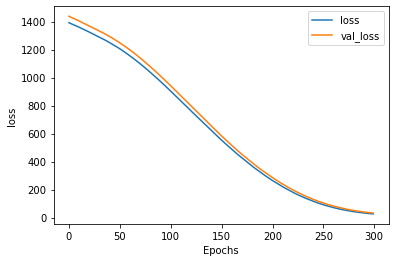

In [819]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'loss')

### Tuning

In [820]:
def tune_nn_model(nr_hidden_layer_neurons):

    seed(42)
    tensorflow.random.set_seed(42)

    callback = EarlyStopping(monitor= 'val_loss', patience=10)
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(nr_hidden_layer_neurons, input_dim = 85, kernel_initializer='normal'),
        tf.keras.layers.Dense(1)
        ])
    nn_model.compile(optimizer="adam",loss='mean_squared_error')
    history = nn_model.fit(X_train_nn_scaled, y_train_nn,  validation_data = [X_validation_scaled, y_validation_nn], epochs=300, verbose = 0, callbacks=[callback])    
    return nn_model, history

In [821]:
nr_neurons = 45
model_list = []
history_list = []

for i in range(1, nr_neurons):
    print(i)
    model, history = tune_nn_model(i)
    model_list.append(model)
    history_list.append(history)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


In [822]:
tuned_nn_preds = []
nn_tuned_metrics_list = []
for i in range(1, nr_neurons):
    tuned_nn_preds.append(model_list[i - 1].predict(X_test_nn_scaled))
    nn_tuned_metrics_list.append(get_metrics(y_test, tuned_nn_preds[i-1].flatten(), "Tuned Neural Network"))

In [823]:
nr_neurons = np.argmax([nn_metrics.QWK.values for nn_metrics in nn_tuned_metrics_list])
nr_neurons

32

In [824]:
nn_tuned_metrics = nn_tuned_metrics_list[nr_neurons].copy()
nn_tuned_metrics

,Model,QWK,PCC,PCC CI lo,PCC CI hi,PCC CI p,R2,RMSE,MSE,MAE
0,Tuned Neural Network,0.71936,0.719229,0.630093,0.789658,2.225371e-24,0.4754,3.81683,14.56822,2.9147


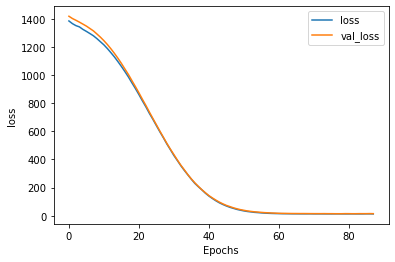

In [825]:
plot_history(history_list[nr_neurons], 'loss')

# Ridge

In [826]:
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [827]:
ridge_preds = ridge.predict(X_test_scaled)

In [828]:
ridge_metrics = get_metrics(y_test, ridge_preds, "Ridge")
ridge_metrics

,Model,QWK,PCC,PCC CI lo,PCC CI hi,PCC CI p,R2,RMSE,MSE,MAE
0,Ridge,0.70686,0.712112,0.621214,0.784102,1.000293e-23,0.43977,3.94431,15.55761,2.89964


### Tuning

In [829]:
ridge_grid = dict()
ridge_grid['alpha'] = np.arange(0, 1, 0.001)

In [830]:
tuned_ridge = Ridge(random_state=42)
ridge_search = GridSearchCV(tuned_ridge, ridge_grid, scoring='r2', cv=cv, n_jobs=-1)
ridge_results = ridge_search.fit(X_train_scaled, y_train)

print('Config: %s' % ridge_results.best_params_)

Config: {'alpha': 0.999}


In [831]:
tuned_ridge_preds = ridge_search.best_estimator_.predict(X_test_scaled)

In [832]:
tuned_ridge_metrics = get_metrics(y_test, tuned_ridge_preds, "Tuned Ridge")
tuned_ridge_metrics

,Model,QWK,PCC,PCC CI lo,PCC CI hi,PCC CI p,R2,RMSE,MSE,MAE
0,Tuned Ridge,0.70686,0.71211,0.621211,0.784101,1.000691e-23,0.43976,3.94437,15.55809,2.89967


# Lasso

In [833]:
lasso = linear_model.Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1, random_state=42)

In [834]:
lasso_preds = lasso.predict(X_test_scaled)

In [835]:
lasso_metrics = get_metrics(y_test, lasso_preds, "Lasso")
lasso_metrics

,Model,QWK,PCC,PCC CI lo,PCC CI hi,PCC CI p,R2,RMSE,MSE,MAE
0,Lasso,0.69054,0.708958,0.617287,0.781636,1.919063e-23,0.49066,3.76092,14.14454,2.83343


### Tuning

In [836]:
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.001)

In [837]:
model = linear_model.Lasso(random_state=42)
search = GridSearchCV(model, grid, scoring='r2', cv=cv, n_jobs=-1)
results = search.fit(X_train_scaled, y_train)

# summarize
print('R2: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

R2: 0.513
Config: {'alpha': 0.198}


In [838]:
tuned_lasso_preds = search.best_estimator_.predict(X_test_scaled)

In [839]:
tuned_lasso_metrics = get_metrics(y_test, tuned_lasso_preds, "Tuned Lasso")
tuned_lasso_metrics

,Model,QWK,PCC,PCC CI lo,PCC CI hi,PCC CI p,R2,RMSE,MSE,MAE
0,Tuned Lasso,0.67515,0.705335,0.612781,0.778801,4.013767e-23,0.49078,3.76049,14.14125,2.8323


In [840]:
coefficients = search.best_estimator_.coef_

In [841]:
importance = np.abs(coefficients)

In [842]:
lasso_coefficients = pd.DataFrame({"features": feature_list, "coefficients":importance})
lasso_coefficients

,features,coefficients
0,nr_stopwords,0.000000
1,avg_sentence_len_words,1.011872
2,unique_words,0.000000
3,word_count,0.000000
4,char_count,0.000000
...,...,...
80,eucl_relative_distance,0.000000
81,det_eucl_dist_matrix,0.000000
82,morans_i,0.109027
83,gearys_c,0.000000


In [843]:
# save lasso feature selection
lasso_coefficients.to_excel("csv_files/results/DS" + str(DS_)  + "_all_lasso_coefficients.xlsx")

In [844]:
lasso_features = lasso_coefficients[lasso_coefficients["coefficients"] > 0].sort_values("coefficients", ascending = False).copy()
lasso_features

,features,coefficients
23,guirauds_index,2.235343
1,avg_sentence_len_words,1.011872
14,gunning_fox_index,0.865144
57,avg_neighbouring_cos_similarity,0.455699
9,nr_sentences,0.381720
5,avg_word_len,0.340982
40,SCONJ,0.219622
54,pattern_cosine,0.203483
49,nr_spelling_errors,0.200954
82,morans_i,0.109027


In [845]:
# save lasso feature selection
lasso_features.to_excel("csv_files/results/DS" + str(DS_) + "_lasso_feature_selection.xlsx")

# Model overview

In [846]:
results = pd.concat([rf_metrics, dt_metrics, extr_tree_metrics, reg_metrics, nn_metrics, ridge_metrics, lasso_metrics], axis = 0).reset_index().drop("index", axis = 1)
results

,Model,QWK,PCC,PCC CI lo,PCC CI hi,PCC CI p,R2,RMSE,MSE,MAE
0,RF Regressor,0.67569,0.704135,0.611290,0.777861,5.112255e-23,0.48485,3.78231,14.305860,2.90338
1,Reg Tree,0.48062,0.483838,0.348300,0.599560,7.044063e-10,-0.14883,5.64831,31.903450,4.62069
2,Extr Random Tree,0.48632,0.491286,0.356856,0.605782,3.512991e-10,-0.14213,5.63181,31.717240,4.32414
3,Linear Reg,0.58377,0.586822,0.468642,0.684367,8.730487e-15,0.14736,4.86600,23.677919,3.98893
4,Neural Network,0.54013,0.710754,0.619523,0.783041,1.325546e-23,-0.07438,5.46221,29.835751,4.54594
5,Ridge,0.70686,0.712112,0.621214,0.784102,1.000293e-23,0.43977,3.94431,15.557610,2.89964
6,Lasso,0.69054,0.708958,0.617287,0.781636,1.919063e-23,0.49066,3.76092,14.144540,2.83343


In [847]:
results.to_excel("csv_files/results/DS" + str(DS_) + "_results_base_models.xlsx")

In [848]:
tuned_results = pd.concat([tuned_rf_metrics, tuned_dt_metrics, extr_tree_metrics, nn_tuned_metrics, tuned_ridge_metrics, tuned_lasso_metrics], axis = 0).reset_index().drop("index", axis = 1)
tuned_results

,Model,QWK,PCC,PCC CI lo,PCC CI hi,PCC CI p,R2,RMSE,MSE,MAE
0,Tuned RF,0.59653,0.698360,0.604123,0.773333,1.610476e-22,0.46171,3.86632,14.94845,2.99771
1,Tuned DT,0.53420,0.584461,0.465833,0.682451,1.184238e-14,0.31628,4.35743,18.98723,3.32139
2,Extr Random Tree,0.48632,0.491286,0.356856,0.605782,3.512991e-10,-0.14213,5.63181,31.71724,4.32414
3,Tuned Neural Network,0.71936,0.719229,0.630093,0.789658,2.225371e-24,0.47540,3.81683,14.56822,2.91470
4,Tuned Ridge,0.70686,0.712110,0.621211,0.784101,1.000691e-23,0.43976,3.94437,15.55809,2.89967
5,Tuned Lasso,0.67515,0.705335,0.612781,0.778801,4.013767e-23,0.49078,3.76049,14.14125,2.83230


In [849]:
tuned_results.to_excel("csv_files/results/DS" + str(DS_) +"_results_tuned_models.xlsx")

# Predictions

In [850]:
tuned_preds =pd.DataFrame({"y_test": y_test, "RF preds": tuned_rf_preds, "DT preds": tuned_dt_preds, "ERT preds": tuned_ert_preds, "LR preds": reg_pred, "NN preds": tuned_nn_preds[nr_neurons].flatten(),
                           "Ridge preds": tuned_ridge_preds, "Lasso preds": tuned_lasso_preds})
tuned_preds

,y_test,RF preds,DT preds,ERT preds,LR preds,NN preds,Ridge preds,Lasso preds
0,40.0,38.214286,40.166667,36.846154,34.486423,40.450748,40.633774,37.620007
1,45.0,39.087719,35.980392,39.312500,34.907780,37.838055,38.202595,37.657425
2,35.0,34.617794,35.980392,36.833333,37.501564,32.103512,33.879826,33.573490
3,30.0,39.082707,40.333333,39.312500,40.278542,40.273712,39.851582,40.760063
4,32.0,39.621554,41.285714,44.157143,34.444328,37.956631,38.675129,38.791576
...,...,...,...,...,...,...,...,...
140,36.0,37.135338,38.173913,36.072727,32.653679,37.457291,37.164700,37.565357
141,27.0,35.348371,37.384615,33.792208,27.401188,28.268028,28.657881,30.350134
142,40.0,38.015038,41.285714,36.072727,41.081192,41.090172,41.166328,38.698444
143,44.0,40.759398,38.151515,39.351852,43.559193,42.702606,41.859074,41.983540


In [851]:
tuned_preds.to_excel("csv_files/results/DS" + str(DS_) + "_predictions_tuned_models.xlsx")